# Premature Death by Neighborhood

A premature death is defined as a death that occurs before the age of 75.  The CDC estimates that up to 40% of premature deaths in the United States are preventable.  Common causes and risk factors include homicide, heart disease, and poor air quality as well as social maladies, such as poverty and racial segregation (source: https://ajph.aphapublications.org/doi/full/10.2105/AJPH.2010.300086).  This analysis examines the median age of death in Pittsburgh to get an understanding of where premature deaths are concentrated in the city.  Those neighborhoods would be excluded from being considered among the safest/best in Pittsburgh.

This project specifically compares the median age of death between the two largest groups in Pittsburgh, Blacks and Whites.  The reason for analysis-by-race is that disparate outcomes by race could suggest that a neighborhood isn't safe for a particular group.  It should be stressed that "safe" doesn't just mean free of violence - it can mean, for instance, a neighborhood whose residents have access to adequate healthcare.  Think "safe space."

It's expected for this submetric to return several Pittsburgh neighborhoods as best/safest, so, for further pruning, the best neighborhood in Pittsburgh is one whose median age of death for Blacks and Whites is:

1. Non-premature
2. Comparable
3. Relatively high (e.g., 80s)
 
**Important note:** the age at which a death is considered premature is based on the *average* age of death for a population (75 for Americans), not the median.  Ideally, a comparison would be done with averages, but WPRDC doesn't have a dataset for the average age of death in Pittsburgh and probably for good reason: the sampled populations in these neighborhoods are so small that averages would skew the data.  

In any case, it's best to say that the comparison between median and average is a loose one.

Originally, this project was going to analyze 211 requests by zip code, but that idea was abandoned because of the inclusion of municipalities in the dataset and the high amount of missing data.  This dataset stood out not only because of the use of Pittburgh neighborhoods, but also for its implications.

#### Analysis

Begin by reading the dataset:

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gdf

file = pd.read_csv("median_age_of_death.csv")
file


,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5
...,...,...,...,...,...,...,...
87,CARRICK,35.0,59.4,622.0,77.0,678.0,75.9
88,BROOKLINE,13.0,61.2,723.0,78.1,750.0,77.8
89,SQUIRREL HILL SOUTH,58.0,83.2,721.0,86.2,802.0,85.9
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting the frame shows what the charted data looks like.  A stacked, horizontal bar chart was chosen for easier viewing.

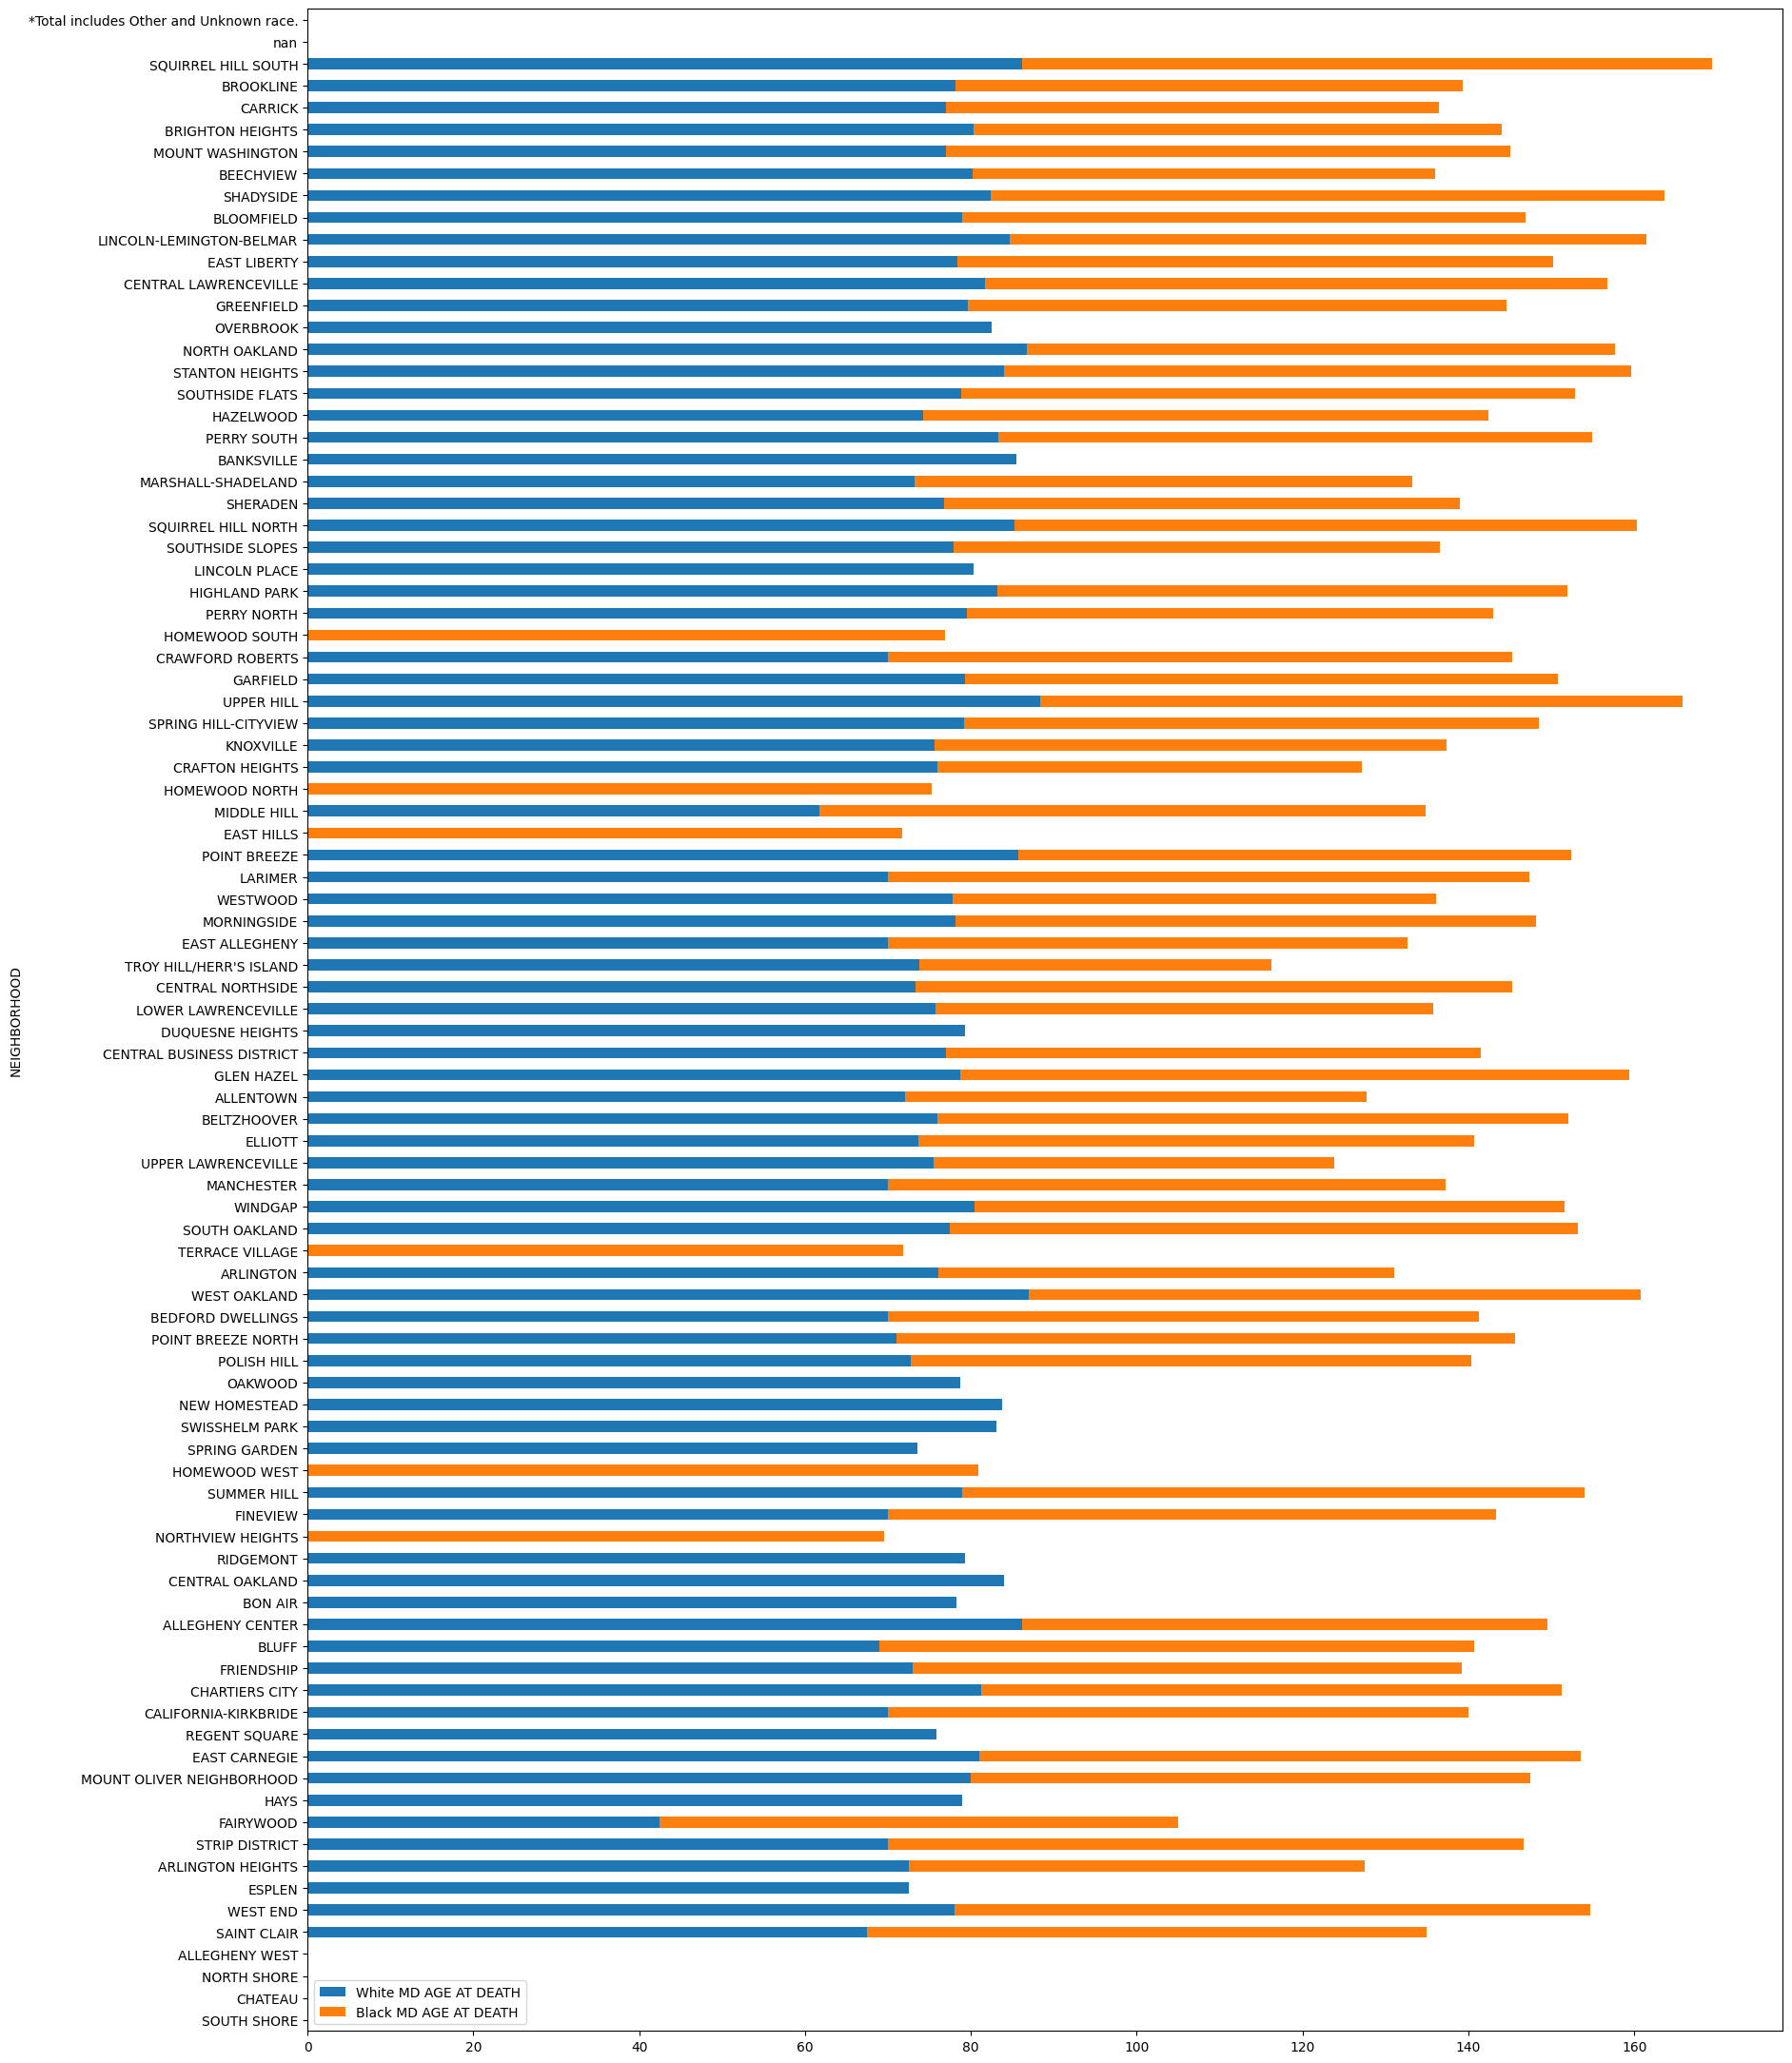

In [188]:
graph = file.plot.barh(x="NEIGHBORHOOD",
y=['White MD AGE AT DEATH', 'Black MD AGE AT DEATH'],
figsize=(20,file.shape[0] * 0.3), 
legend=True, 
stacked='true')

Next, the dataset is cleaned up by filtering it for the desired columns: neighborhood, a neighborhood's Black and White median age of death, and a neighborhood's total median age of death.  The last column will be used for plotting with geopandas.  

In [198]:
file = pd.read_csv("median_age_of_death.csv", usecols=["NEIGHBORHOOD", "Black MD AGE AT DEATH", "White MD AGE AT DEATH", "TOTAL MD AGE AT DEATH"])
file

,NEIGHBORHOOD,Black MD AGE AT DEATH,White MD AGE AT DEATH,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0
1,CHATEAU,0.0,NaN,NaN
2,NORTH SHORE,0.0,NaN,80.0
3,ALLEGHENY WEST,NaN,NaN,65.0
4,SAINT CLAIR,67.5,67.5,67.5
...,...,...,...,...
87,CARRICK,59.4,77.0,75.9
88,BROOKLINE,61.2,78.1,77.8
89,SQUIRREL HILL SOUTH,83.2,86.2,85.9
90,NaN,NaN,NaN,NaN


Next, the new dataframe is converted into a list.  A loop checks for the condition of non-premature death: if a neighborhood's Black **and** White decedents have a median age of death greater than or equal to 75, the neighborhood and its corresponding values will be stored in the list, over75; else, the data points will be added to another list called under75.

In [207]:
li = file.values.tolist()
over75 = []
under75 = []

for hood in li:
    if(hood[1] >= 74.5 and hood[2] >= 74.5):
        over75.append(hood[0])
        over75.append(hood[1])
        over75.append(hood[2])
        over75.append(hood[3])
    else:
        under75.append(hood[0])
        under75.append(hood[1])
        under75.append(hood[2])
        under75.append(hood[3])


A sample of "non-premature" neighborhoods:

In [222]:
over75

['WEST END',
 76.7,
 78.0,
 77.5,
 'SUMMER HILL',
 75.0,
 79.0,
 78.3,
 'SOUTH OAKLAND',
 75.7,
 77.5,
 77.1,
 'BELTZHOOVER',
 76.1,
 76.0,
 76.6,
 'GLEN HAZEL',
 80.7,
 78.7,
 79.8,
 'UPPER HILL',
 77.4,
 88.4,
 81.7,
 'SQUIRREL HILL NORTH',
 75.0,
 85.3,
 85.0,
 'STANTON HEIGHTS',
 75.6,
 84.0,
 80.5,
 'CENTRAL LAWRENCEVILLE',
 75.0,
 81.7,
 81.3,
 'LINCOLN-LEMINGTON-BELMAR',
 76.7,
 84.7,
 78.8,
 'SHADYSIDE',
 81.2,
 82.4,
 82.1,
 'SQUIRREL HILL SOUTH',
 83.2,
 86.2,
 85.9]

There is a problem with this list: the data isn't in the correct format.  A neighborhood should be grouped with its three median ages.  This list is returning the items as discrete pieces of data.  The code below loops through the list and places elements into groups of four.  

In [220]:
non_prem_list = [over75[i:i+4] for i in range(0, len(over75), 4)]
prem_list1 = [under75[i:i+4] for i in range(0, len(under75), 4)] 

non_prem_list

[['WEST END', 76.7, 78.0, 77.5],
 ['SUMMER HILL', 75.0, 79.0, 78.3],
 ['SOUTH OAKLAND', 75.7, 77.5, 77.1],
 ['BELTZHOOVER', 76.1, 76.0, 76.6],
 ['GLEN HAZEL', 80.7, 78.7, 79.8],
 ['UPPER HILL', 77.4, 88.4, 81.7],
 ['SQUIRREL HILL NORTH', 75.0, 85.3, 85.0],
 ['STANTON HEIGHTS', 75.6, 84.0, 80.5],
 ['CENTRAL LAWRENCEVILLE', 75.0, 81.7, 81.3],
 ['LINCOLN-LEMINGTON-BELMAR', 76.7, 84.7, 78.8],
 ['SHADYSIDE', 81.2, 82.4, 82.1],
 ['SQUIRREL HILL SOUTH', 83.2, 86.2, 85.9]]

Both lists are merged for plotting in geopandas:

In [215]:
merge_lists = non_prem_list + prem_list1 #For plotting

Finally, non_prem_list will be converted to a dataframe and plotted as a stacked, horizontal bar chart:

In [217]:
convert = pd.DataFrame(non_prem_list, 
columns=['Neighborhood', 
         'Black MD Age', 
         'White MD Age', 
         'Total MD Age']).sort_values(by=["Total MD Age"], ascending=False)
convert

,Neighborhood,Black MD Age,White MD Age,Total MD Age
11,SQUIRREL HILL SOUTH,83.2,86.2,85.9
6,SQUIRREL HILL NORTH,75.0,85.3,85.0
10,SHADYSIDE,81.2,82.4,82.1
5,UPPER HILL,77.4,88.4,81.7
8,CENTRAL LAWRENCEVILLE,75.0,81.7,81.3
7,STANTON HEIGHTS,75.6,84.0,80.5
4,GLEN HAZEL,80.7,78.7,79.8
9,LINCOLN-LEMINGTON-BELMAR,76.7,84.7,78.8
1,SUMMER HILL,75.0,79.0,78.3
0,WEST END,76.7,78.0,77.5


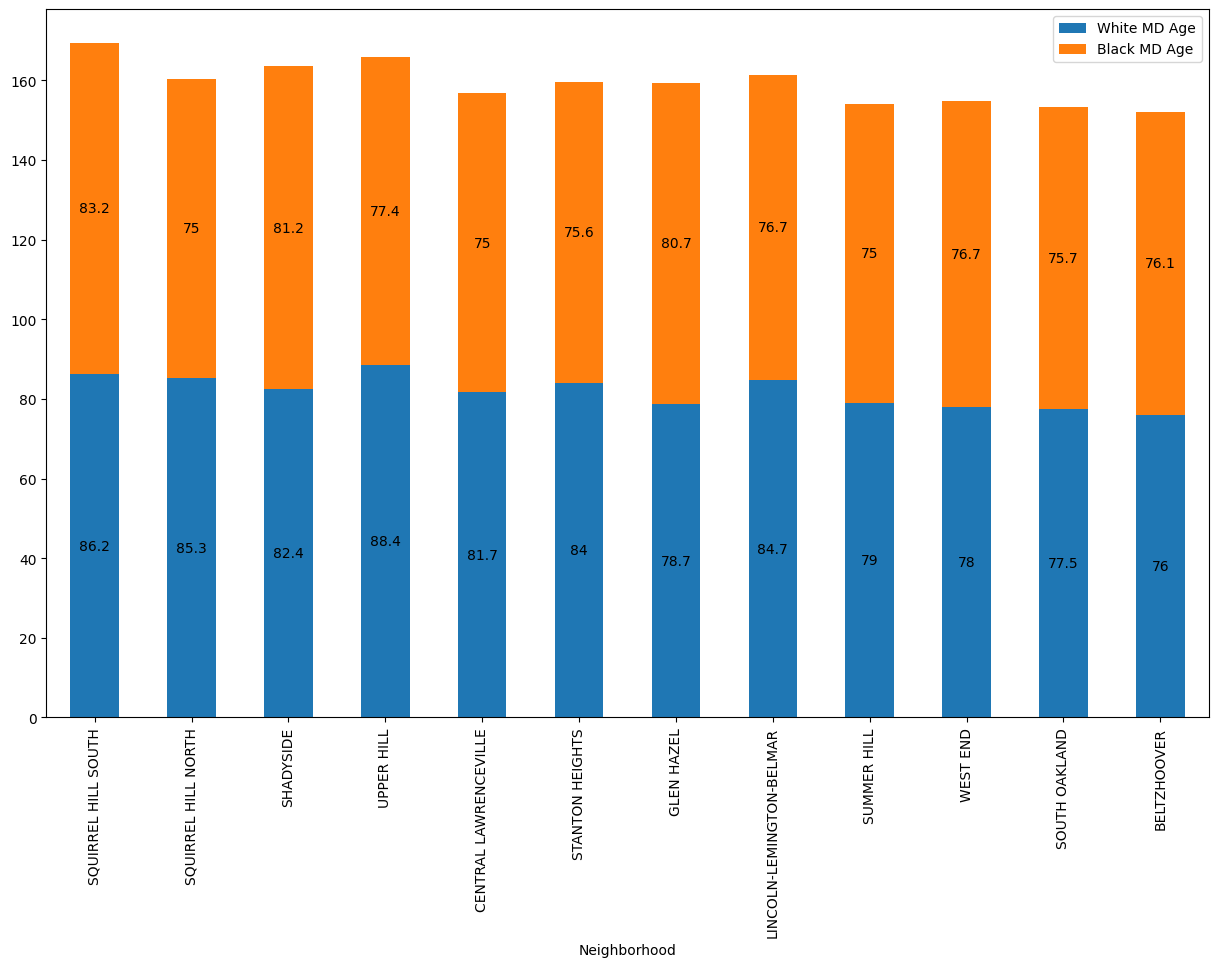

In [223]:
ax = convert.plot.bar(x="Neighborhood", y=["White MD Age", "Black MD Age"], figsize=(15,file.shape[0] * 0.1), stacked=True)
plt.legend(loc="upper right")
plt.show

for container in ax.containers:
   ax.bar_label(container, label_type='center')

#### Results

Because the gap in Black-White median age of death is small, and because BOTH groups have a high median age of death, **Squirrel Hill South** is the best neighborhood in Pittsburgh.  

Plotting the total median age of death for the top neighborhoods gives another perspective in how they rank.  For most people, this is easier to visually understand, but this chart is slightly deceptive. Take, for example, Squirrel Hill North.  The neighborhood ranks high, but what isn't shown is the 10-year gap in median age of death between Blacks and Whites.  For that matter, the Black median age of death is just barely 75.

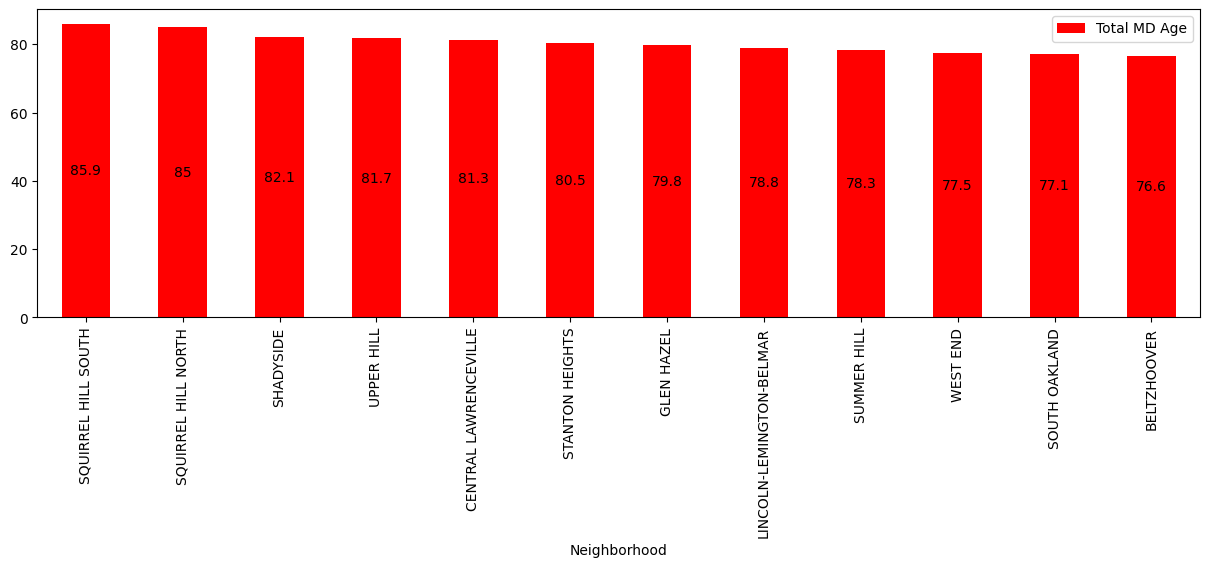

In [202]:
ax = convert.plot.bar(x="Neighborhood", y=["Total MD Age"], figsize=(15, 4), color='Red'
)
plt.legend(loc="upper right")
plt.show

for container in ax.containers:
   ax.bar_label(container, label_type='center')

Geopandas is used to create a neighborhood visualization.  Recall that merge_lists was created after splitting the dataset into two lists and combining them.   

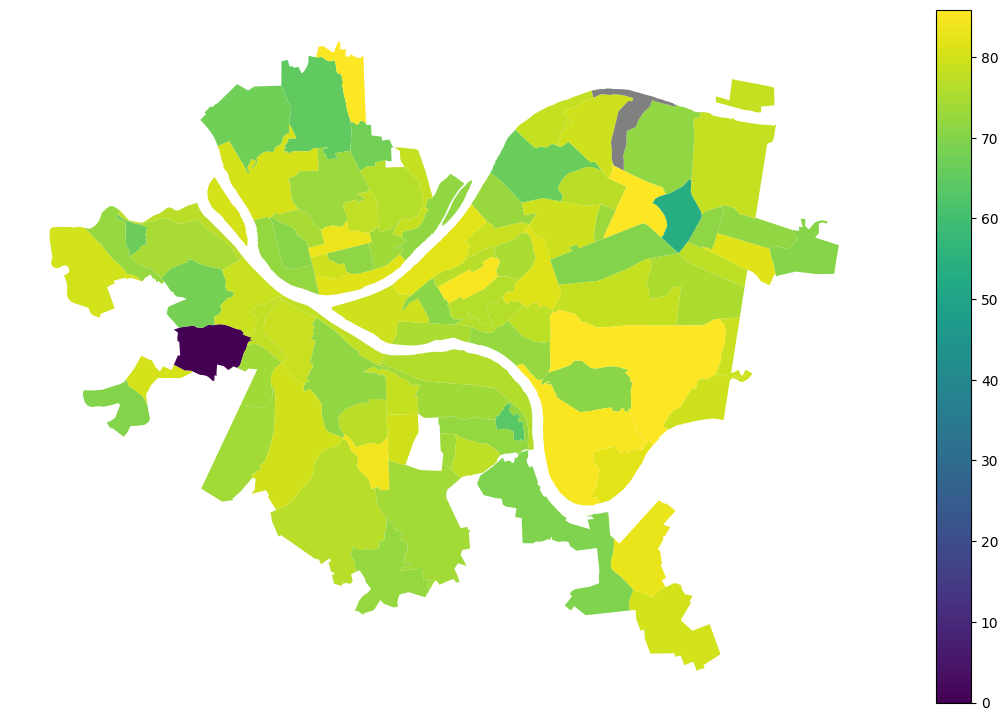

In [221]:
geo = gdf.read_file('Neighborhoods_.shp')

p = pd.DataFrame(merge_lists, 
columns=['Neighborhood', 
         'Black MD Age', 
         'White MD Age',
         'Total MD Age'])

f = geo.merge(p, left_index=True, right_index=True)

frame1 = gdf.GeoDataFrame(f)

frame1.plot(column='Total MD Age', 
#cmap='OrRd', 
figsize=(15, 9), 
legend=True, 
missing_kwds=dict(color='grey', label='No Data')
)
plt.axis('off')
plt.show()

#Note: Please use this map for reference.  The map in our final notebook is different, but it's not clear why.

### Winner: Squirrel Hill South

#### Final Thoughts

It's notable that out of 90 neighborhoods, Pittsburgh only has 11 where Blacks and Whites **both** live past the age of premature death.  

I expected a neighborhood with many high earners to win, so I thought Shadyside would be the clear winner.  I didn't anticipate Squirrel Hill South to win simply because I forget that it's a residential neighborhood. I don't know the socioeconomic status of Squirrel Hill South, so I wonder whether it fits my expectations.